[Axes.scatter](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)

# 插图及简介

"scatter 是最简单的图表！"  
"scatter 是最直观的图表，符合人们对笛卡尔坐标的直觉认识。"  
"scatter 是散点图，……"

关于散点图人们有很多讨论，我也觉得这是一种简单到无法解释的图表，如果泛泛而谈那就是一堆废话，如果深入说明那是千言万语也难说清的。

所以直接动手就对了，没啥好bibilili的

# 亲手画一张散点图

> 这一章有必要吗？

[How to Make a Scatter Plot](https://www.wikihow.com/Make-a-Scatter-Plot)  
[Scatter Diagram](https://asq.org/quality-resources/scatter-diagram)

1. **选择你的自变量与因变量。** 大部分散点图都有2个变量，被用于2个轴。自变量是你将操作与改变的变量。而因变量是随着自变量而变化的变量。找出你的2个变量中的哪个是因变量那个是自变量。  
记住这一点的一种简单方法是因变量的值取决于自变量的值。例如，如果您要制作一个散布图来比较人们的年龄和身高，则自变量将是年龄。 因变量将是人的身高，因为该变量会根据人的年龄而变化。
2. **为自变量绘制x轴。** 自变量通常位于散点图的底部。这就是所谓的“ x轴”。 沿着纸的底部画一条直线，并在其上标记点，这些点覆盖自变量中从最低到最高的数字范围。  
如果你为与年龄相应的身高作图，则被测人员的年龄会沿x轴显示。如果您测量的最小的人是1岁，而测量的最大的人是20岁，则您需要沿线从1到20均匀分布20个点。
使用方格纸绘制散点图会更容易。对于自变量中的每个唯一结果，在方格纸上使用1个框。 例如，您可以绘制一条长20盒的线作为散点图，以比较年龄和1至20岁的人的身高。

# 电子表格绘图法



# matplotlib法

In [20]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib import rcParams
import numpy as np
import inspect

In [9]:
rcParams['font.family'] = ['DengXian', 'Sans-serif']

我们在[matplotlib基础](https://zhuanlan.zhihu.com/p/147256790)中提过图表是由艺术家使用渲染器在画布上完成的。

而艺术家有两种类型：图元与容器。图元表示绘制在画布上的标准图形对象，如：Line2D，容器是放置图元的位置如：Axis，Axes和Figure。标准用法是创建一个Figure实例，使用Figure来创建一个或多个Axes或Subplot实例，并使用Axes实例的辅助方法创建图元。

Axes实例中有20个基础的辅助制图方法，其中就包括scatter方法。

散点图的首要目的是帮助人们直观的感受自变量与因变量的相关性。自变量与因变量自然也就是绘制散点图的必要参数。

数据将显示为点的集合，每个点的一个变量值确定水平轴上的位置，而另一个变量值确定垂直轴上的位置。

In [3]:
inspect.signature(Axes.scatter)

<Signature (self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

In [2]:
# fake data
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

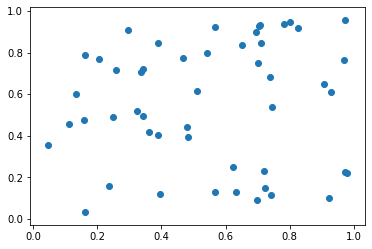

In [5]:
plt.scatter(x, y)

scatter相关基础知识  
- [Scatter plot](https://encyclopedia.thefreedictionary.com/scatter+plot)
- [Scatter plot : wikimili](https://wikimili.com/en/Scatter_plot)
- [A Complete Guide to Scatter Plots](https://chartio.com/learn/charts/what-is-a-scatter-plot/)

**wikipedia**  
To identify the type of relationship (if any) between two quantitative variables

John Herschel[1]

A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

散点图用于识别两个定量变量之间的关系类型。John Herschel是我们知道的第一个对散点图进行描述的人。

使用笛卡尔坐标系显示一组数据，通常是两个变量的值。如果对点进行了编码（颜色/形状/大小），则可以显示一个或多个附加变量。

s : scalar or array-like, shape (n, ), optional

The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

scatter方法的参数 c 用于定义点的颜色，参数 s 用于定义点的大小。

In [3]:
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2    # 0 to 15 point radii

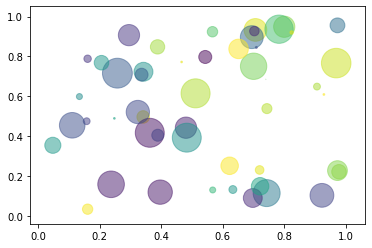

In [7]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

[Scatter plot](https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py)  
例1.完成

“scatter真的的很简单，但是我的数据是表中的列啊！”

对于像numpy.recarry 或 pandas.DataFrame 这种类型的数据，matplotlib允许将其赋予data关键字参数，之后使用列名称字符串引用相应的数据。

In [8]:
data = {
    'a' : x,
    'b' : y,
    'c' : area,
    'd' : colors
}

[Text(0, 0.5, 'entry b'), Text(0.5, 0, 'entry a')]

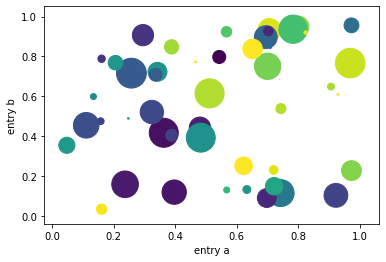

In [9]:
fig, ax = plt.subplots()
ax.scatter('a', 'b', s='c', c='d', data=data)
ax.set(xlabel='entry a', ylabel='entry b')

[Plotting with keywords](https://matplotlib.org/gallery/misc/keyword_plotting.html#sphx-glr-gallery-misc-keyword-plotting-py)  
例2.完成

“看变了大小颜色，我形依然未变。”

scatter方法的参数 marker 用于定义点的形状。$\clubsuit$在Mathtext中是三叶草，希望在这个不太平的时期给我们每一个人带来些许的好运。

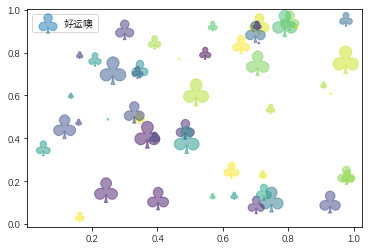

In [10]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5, marker='$\clubsuit$', label="好运噢")
plt.legend(loc='upper left')

“不使用scatter方法能画出散点图吗？”  
“这不是自找麻烦吗？”  
“能吗？”  
“能！”  

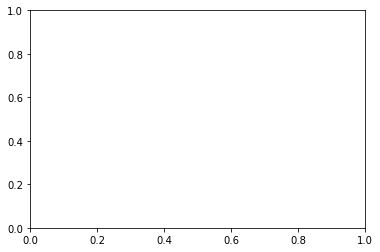

In [43]:
fig, ax = plt.subplots()

In [ ]:
def _process_unit_info(self, xdata=None, ydata=None, kwargs=None):
    """Look for unit *kwargs* and update the axis instances as necessary"""

    def _process_single_axis(data, axis, unit_name, kwargs):
        # Return if there's no axis set
        if axis is None:
            return kwargs

        if data is not None:
            # We only need to update if there is nothing set yet.
            if not axis.have_units():
                axis.update_units(data)

        # Check for units in the kwargs, and if present update axis
        if kwargs is not None:
            units = kwargs.pop(unit_name, axis.units)
            if self.name == 'polar':
                polar_units = {'xunits': 'thetaunits', 'yunits': 'runits'}
                units = kwargs.pop(polar_units[unit_name], units)

            if units != axis.units:
                axis.set_units(units)
                # If the units being set imply a different converter,
                # we need to update.
                if data is not None:
                    axis.update_units(data)
        return kwargs

    kwargs = _process_single_axis(xdata, self.xaxis, 'xunits', kwargs)
    kwargs = _process_single_axis(ydata, self.yaxis, 'yunits', kwargs)
    return kwargs

In [45]:
ax.xaxis.have_units()

False

其实，在matplotlib中颜色是一个比较复杂的概念，因为matplotlib支持的颜色格式太多了，scatter方法就有许多关于颜色的方法，让人困惑。

In [ ]:
@_preprocess_data(replace_names=["x", "y", "s", "linewidths",
                                 "edgecolors", "c", "facecolor",
                                 "facecolors", "color"],
                  label_namer="y")
@cbook._delete_parameter("3.2", "verts")
def scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None,
            vmin=None, vmax=None, alpha=None, linewidths=None,
            verts=None, edgecolors=None, *, plotnonfinite=False,
            **kwargs):
    """
    A scatter plot of *y* vs. *x* with varying marker size and/or color.

    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.

    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.

    c : array-like or list of colors or color, optional
        The marker colors. Possible values:

        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.

        Note that *c* should not be a single numeric RGB or RGBA sequence
        because that is indistinguishable from an array of values to be
        colormapped. If you want to specify the same RGB or RGBA value for
        all points, use a 2-D array with a single row.  Otherwise, value-
        matching will have precedence in case of a size matching with *x*
        and *y*.

        If you wish to specify a single color for all points
        prefer the *color* keyword argument.

        Defaults to `None`. In that case the marker color is determined
        by the value of *color*, *facecolor* or *facecolors*. In case
        those are not specified or `None`, the marker color is determined
        by the next color of the ``Axes``' current "shape and fill" color
        cycle. This cycle defaults to :rc:`axes.prop_cycle`.

    marker : `~.markers.MarkerStyle`, default: :rc:`scatter.marker`
        The marker style. *marker* can be either an instance of the class
        or the text shorthand for a particular marker.
        See :mod:`matplotlib.markers` for more information about marker
        styles.

    cmap : str or `~matplotlib.colors.Colormap`, default: :rc:`image.cmap`
        A `.Colormap` instance or registered colormap name. *cmap* is only
        used if *c* is an array of floats.

    norm : `~matplotlib.colors.Normalize`, default: None
        If *c* is an array of floats, *norm* is used to scale the color
        data, *c*, in the range 0 to 1, in order to map into the colormap
        *cmap*.
        If *None*, use the default `.colors.Normalize`.

    vmin, vmax : float, default: None
        *vmin* and *vmax* are used in conjunction with the default norm to
        map the color array *c* to the colormap *cmap*. If None, the
        respective min and max of the color array is used.
        It is deprecated to use *vmin*/*vmax* when *norm* is given.

    alpha : float, default: None
        The alpha blending value, between 0 (transparent) and 1 (opaque).

    linewidths : float or array-like, default: :rc:`lines.linewidth`
        The linewidth of the marker edges. Note: The default *edgecolors*
        is 'face'. You may want to change this as well.

    edgecolors : {'face', 'none', *None*} or color or sequence of color, \
default: :rc:`scatter.edgecolors`
        The edge color of the marker. Possible values:

        - 'face': The edge color will always be the same as the face color.
        - 'none': No patch boundary will be drawn.
        - A color or sequence of colors.

        For non-filled markers, *edgecolors* is ignored. Instead, the color
        is determined like with 'face', i.e. from *c*, *colors*, or
        *facecolors*.

    plotnonfinite : bool, default: False
        Set to plot points with nonfinite *c*, in conjunction with
        `~matplotlib.colors.Colormap.set_bad`.

    Returns
    -------
    `~matplotlib.collections.PathCollection`

    Other Parameters
    ----------------
    **kwargs : `~matplotlib.collections.Collection` properties

    See Also
    --------
    plot : To plot scatter plots when markers are identical in size and
        color.

    Notes
    -----
    * The `.plot` function will be faster for scatterplots where markers
      don't vary in size or color.

    * Any or all of *x*, *y*, *s*, and *c* may be masked arrays, in which
      case all masks will be combined and only unmasked points will be
      plotted.

    * Fundamentally, scatter works with 1-D arrays; *x*, *y*, *s*, and *c*
      may be input as N-D arrays, but within scatter they will be
      flattened. The exception is *c*, which will be flattened only if its
      size matches the size of *x* and *y*.

    """
    # Process **kwargs to handle aliases, conflicts with explicit kwargs:

    self._process_unit_info(xdata=x, ydata=y, kwargs=kwargs)
    x = self.convert_xunits(x)
    y = self.convert_yunits(y)

    # np.ma.ravel yields an ndarray, not a masked array,
    # unless its argument is a masked array.
    x = np.ma.ravel(x)
    y = np.ma.ravel(y)
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    if s is None:
        s = (20 if rcParams['_internal.classic_mode'] else
             rcParams['lines.markersize'] ** 2.0)
    s = np.ma.ravel(s)
    if len(s) not in (1, x.size):
        raise ValueError("s must be a scalar, or the same size as x and y")

    c, colors, edgecolors = \
        self._parse_scatter_color_args(
            c, edgecolors, kwargs, x.size,
            get_next_color_func=self._get_patches_for_fill.get_next_color)

    if plotnonfinite and colors is None:
        c = np.ma.masked_invalid(c)
        x, y, s, edgecolors, linewidths = \
            cbook._combine_masks(x, y, s, edgecolors, linewidths)
    else:
        x, y, s, c, colors, edgecolors, linewidths = \
            cbook._combine_masks(
                x, y, s, c, colors, edgecolors, linewidths)

    scales = s   # Renamed for readability below.

    # load default marker from rcParams
    if marker is None:
        marker = rcParams['scatter.marker']

    if isinstance(marker, mmarkers.MarkerStyle):
        marker_obj = marker
    else:
        marker_obj = mmarkers.MarkerStyle(marker)

    path = marker_obj.get_path().transformed(
        marker_obj.get_transform())
    if not marker_obj.is_filled():
        if linewidths is None:
            linewidths = rcParams['lines.linewidth']
        elif np.iterable(linewidths):
            linewidths = [
                lw if lw is not None else rcParams['lines.linewidth']
                for lw in linewidths]

    offsets = np.ma.column_stack([x, y])

    collection = mcoll.PathCollection(
            (path,), scales,
            facecolors=colors if marker_obj.is_filled() else 'none',
            edgecolors=edgecolors if marker_obj.is_filled() else colors,
            linewidths=linewidths,
            offsets=offsets,
            transOffset=kwargs.pop('transform', self.transData),
            alpha=alpha
            )
    collection.set_transform(mtransforms.IdentityTransform())
    collection.update(kwargs)

    if colors is None:
        collection.set_array(c)
        collection.set_cmap(cmap)
        collection.set_norm(norm)
        collection._scale_norm(norm, vmin, vmax)

    # Classic mode only:
    # ensure there are margins to allow for the
    # finite size of the symbols.  In v2.x, margins
    # are present by default, so we disable this
    # scatter-specific override.
    if rcParams['_internal.classic_mode']:
        if self._xmargin < 0.05 and x.size > 0:
            self.set_xmargin(0.05)
        if self._ymargin < 0.05 and x.size > 0:
            self.set_ymargin(0.05)

    self.add_collection(collection)
    self._request_autoscale_view()

    return collection

In [34]:
def is_scalar_or_string(val):
    """Return whether the given object is a scalar or string like."""
    return isinstance(val, str) or not np.iterable(val)

In [36]:
def safe_masked_invalid(x, copy=False):
    x = np.array(x, subok=True, copy=copy)
    if not x.dtype.isnative:
        # Note that the argument to `byteswap` is 'inplace',
        # thus if we have already made a copy, do the byteswap in
        # place, else make a copy with the byte order swapped.
        # Be explicit that we are swapping the byte order of the dtype
        x = x.byteswap(copy).newbyteorder('S')

    try:
        xm = np.ma.masked_invalid(x, copy=False)
        xm.shrink_mask()
    except TypeError:
        return x
    return xm

In [31]:
def _combine_masks(*args):
    """
    Find all masked and/or non-finite points in a set of arguments,
    and return the arguments as masked arrays with a common mask.

    Arguments can be in any of 5 categories:

    1) 1-D masked arrays
    2) 1-D ndarrays
    3) ndarrays with more than one dimension
    4) other non-string iterables
    5) anything else

    The first argument must be in one of the first four categories;
    any argument with a length differing from that of the first
    argument (and hence anything in category 5) then will be
    passed through unchanged.

    Masks are obtained from all arguments of the correct length
    in categories 1, 2, and 4; a point is bad if masked in a masked
    array or if it is a nan or inf.  No attempt is made to
    extract a mask from categories 2 and 4 if :meth:`np.isfinite`
    does not yield a Boolean array.  Category 3 is included to
    support RGB or RGBA ndarrays, which are assumed to have only
    valid values and which are passed through unchanged.

    All input arguments that are not passed unchanged are returned
    as masked arrays if any masked points are found, otherwise as
    ndarrays.

    """
    if not len(args):
        return ()
    if is_scalar_or_string(args[0]):
        raise ValueError("First argument must be a sequence")
    nrecs = len(args[0])
    margs = []  # Output args; some may be modified.
    seqlist = [False] * len(args)  # Flags: True if output will be masked.
    masks = []    # List of masks.
    for i, x in enumerate(args):
        if is_scalar_or_string(x) or len(x) != nrecs:
            margs.append(x)  # Leave it unmodified.
        else:
            if isinstance(x, np.ma.MaskedArray) and x.ndim > 1:
                raise ValueError("Masked arrays must be 1-D")
            x = np.asanyarray(x)
            if x.ndim == 1:
                x = safe_masked_invalid(x)
                seqlist[i] = True
                if np.ma.is_masked(x):
                    masks.append(np.ma.getmaskarray(x))
            margs.append(x)  # Possibly modified.
    if len(masks):
        mask = np.logical_or.reduce(masks)
        for i, x in enumerate(margs):
            if seqlist[i]:
                margs[i] = np.ma.array(x, mask=mask)
    return margs

In [ ]:
area

In [26]:
s = np.ma.ravel(area)

In [28]:
colors

array([0.78422978, 0.39704754, 0.15464683, 0.72119325, 0.8368309 ,
       0.9378552 , 0.57671382, 0.19502656, 0.11779397, 0.9506002 ,
       0.2836723 , 0.95656242, 0.90942546, 0.32842519, 0.95176557,
       0.11632148, 0.87431415, 0.98522547, 0.75033538, 0.98515647,
       0.99018024, 0.06097709, 0.00373598, 0.81250321, 0.58273672,
       0.15024598, 0.15217356, 0.5270595 , 0.4794052 , 0.09218994,
       0.51195743, 0.04283111, 0.80629615, 0.24219866, 0.8482111 ,
       0.69558986, 0.36132686, 0.50570144, 0.29417242, 0.66008457,
       0.53413535, 0.19481606, 0.86190568, 0.97802889, 0.88218663,
       0.52735917, 0.22140904, 0.20272247, 0.0755575 , 0.95256799])

In [29]:
c = np.ma.masked_invalid(colors)

In [32]:
edgecolors, linewidths = None, None

In [37]:
x, y, s, edgecolors, linewidths = _combine_masks(x, y, s, edgecolors, linewidths)

In [42]:
linewidths

c : array-like or list of colors or color, optional

The marker colors. Possible values:

- A scalar or sequence of n numbers to be mapped to colors using cmap and norm.
- A 2-D array in which the rows are RGB or RGBA.
- A sequence of colors of length n.
- A single color format string.

Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. If you want to specify the same RGB or RGBA value for all points, use a 2-D array with a single row. Otherwise, value- matching will have precedence in case of a size matching with x and y.

If you wish to specify a single color for all points prefer the color keyword argument.

Defaults to None. In that case the marker color is determined by the value of color, facecolor or facecolors. In case those are not specified or None, the marker color is determined by the next color of the Axes' current "shape and fill" color cycle. This cycle defaults to rcParams["axes.prop_cycle"] (default: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])).

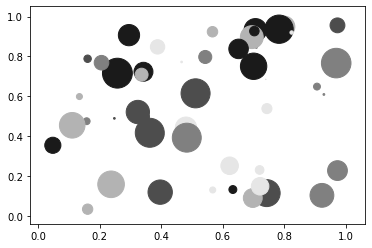

In [19]:
plt.scatter(x, y, s=area, c=('0.1','0.3','0.5','0.7','0.9')*10)

Overview

A scatter plot can be used either when one continuous variable that is under the control of the experimenter and the other depends on it or when both continuous variables are independent. If a parameter exists that is systematically incremented and/or decremented by the other, it is called the control parameter or independent variable and is customarily plotted along the horizontal axis. The measured or dependent variable is customarily plotted along the vertical axis. If no dependent variable exists, either type of variable can be plotted on either axis and a scatter plot will illustrate only the degree of correlation (not causation) between two variables.

A scatter plot can suggest various kinds of correlations between variables with a certain confidence interval. For example, weight and height, weight would be on y axis and height would be on the x axis. Correlations may be positive (rising), negative (falling), or null (uncorrelated). If the pattern of dots slopes from lower left to upper right, it indicates a positive correlation between the variables being studied. If the pattern of dots slopes from upper left to lower right, it indicates a negative correlation. A line of best fit (alternatively called 'trendline') can be drawn in order to study the relationship between the variables. An equation for the correlation between the variables can be determined by established best-fit procedures. For a linear correlation, the best-fit procedure is known as linear regression and is guaranteed to generate a correct solution in a finite time. No universal best-fit procedure is guaranteed to generate a correct solution for arbitrary relationships. A scatter plot is also very useful when we wish to see how two comparable data sets agre to show nonlinear relationships between variables. The ability to do this can be enhanced by adding a smooth line such as LOESS.[5] Furthermore, if the data are represented by a mixture model of simple relationships, these relationships will be visually evident as superimposed patterns.

The scatter diagram is one of the seven basic tools of quality control.[6]

Scatter charts can be built in the form of bubble, marker, or/and line charts.[7]